In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\cl501_27\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [3]:
df['Currency Pair']

0        USD/INR
1        USD/INR
2        USD/INR
3        USD/INR
4        USD/INR
          ...   
18233    GBP/INR
18234    GBP/INR
18235    GBP/INR
18236    GBP/INR
18237    GBP/INR
Name: Currency Pair, Length: 18238, dtype: object

In [4]:
eur_inr = df.loc[df['Currency Pair']=='EUR/INR']
eur_inr.reset_index(drop=True,inplace=True)


In [5]:
import swing_technical_indicators 

In [6]:
print(dir(swing_technical_indicators))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


In [7]:
eur_inr['Date']= pd.to_datetime(eur_inr['Date'])

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\2606171424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['Date']= pd.to_datetime(eur_inr['Date'])


In [8]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in eur_inr.columns : 
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(eur_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.871375
p-value: 0.992705
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.160348
p-value: 0.690416
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.270712
p-value: 0.642463
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -0.983390
p-value: 0.759274
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).
    
    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')
    
    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal
    
    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(eur_inr, col, period=14)  # Adjust the period as needed
    eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [10]:
eur_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684
...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909


## EMA 100 Feature 

In [11]:
eur_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 100)
eur_inr

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\3257948380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 100)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227
...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923


## EMA 200 

In [12]:
eur_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(eur_inr, 'Closing_price', 200)
eur_inr

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\1721681082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(eur_inr, 'Closing_price', 200)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729
...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569


## EMA 50 

In [13]:
eur_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 50)
eur_inr

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\2256675651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 50)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471


## RSI Feature 

In [14]:
eur_inr['RSI'] = swing_technical_indicators.calculate_rsi(eur_inr,'Closing_price',21)
eur_inr

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\648986798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['RSI'] = swing_technical_indicators.calculate_rsi(eur_inr,'Closing_price',21)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000,0.000000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647,0.000000
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743,0.000000
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734,0.000000
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926,31.002374
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725,22.088720
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049,32.043599
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471,33.606593


In [15]:
import plotly.express as px 
px.line(eur_inr['RSI'])

## MACD

In [16]:
eur_inr_macd = swing_technical_indicators.calculate_macd(eur_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in eur_inr_macd.columns:

    eur_inr[f"{i}"] = eur_inr_macd[f'{i}']

eur_inr

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cl501_27\AppData\Local\Temp\ipykernel_10864\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000,0.000000,0.000000,0.000000,0.000000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647,0.000000,0.003350,0.000670,0.002680
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743,0.000000,-0.088625,-0.017189,-0.071436
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734,0.000000,-0.122788,-0.038309,-0.084480
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430,0.000000,-0.132440,-0.057135,-0.075305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926,31.002374,-0.536265,-0.428964,-0.107301
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725,22.088720,-0.587293,-0.460630,-0.126663
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049,32.043599,-0.550084,-0.478521,-0.071564
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471,33.606593,-0.507141,-0.484245,-0.022896


## Bollinger Bands 

In [17]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(eur_inr['Closing_price'])

eur_inr = eur_inr.join(bollinger_data)
eur_inr.drop('Price',axis=1, inplace=True)

c:\Users\cl501_27\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\cl501_27\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [18]:

X1 = eur_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =eur_inr['Closing_price']

## Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X= pd.DataFrame(X,columns = X1.columns)

## Supervised ML Models 

In [21]:
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}

        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
        # Fit the model
    rf.fit(X_train, y_train)
        
        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    rf_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nRandom Forest Metrics :", rf_metrics)
        
random_forest_model(X,y)

Mean Absolute Error : 0.13904826436781736
Mean Absolute Percentage Error (MAPE): 0.17328270995102749%
R-squared (R^2): 0.9987320739231694 

Random Forest Metrics : {'MACD_Histogram': {'MAE': 0.13904826436781736, 'MAPE': 0.17328270995102749, 'R^2': 0.9987320739231694}}


## SVM 

In [22]:
from sklearn.svm import SVR
# SVM Model
def svm_model(X,y):
    svm = SVR()
    svm_metrics = {}
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict
    y_pred = svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    svm_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}
    
    print("\nSVM Metrics :", svm_metrics)

svm_model(X,y)

Mean Absolute Error : 0.202400348705951
Mean Absolute Percentage Error : 0.2555245828101596%
R-squared (R^2) : 0.997765496817527

SVM Metrics : {'MAE': 0.202400348705951, 'MAPE': 0.2555245828101596, 'R^2': 0.997765496817527}


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def svm_model_with_hyperparameter_tuning(X,y):
    
    
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")
    
    # Get the best model
    best_svm = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics for each currency pair
    svm_metrics= {
        'MAE': mae,
        'MAPE': mape,
        'R^2': r2
    }
    
    print(f"MAE : {mae}")
    print(f"MAPE : {mape}%")
    print(f"R^2 : {r2}")

# Return the metrics for all currency pairs
    return svm_metrics
  
svm_model_with_hyperparameter_tuning(X,y)

KeyboardInterrupt: 

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def gradient_boosting_model(X,y):
    
    gb = GradientBoostingRegressor()
    gb_metrics = {}

    
    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
        
        # Train the model
    gb.fit(X_train, y_train)
    
    # Predict
    y_pred = gb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2}")
    
    gb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nGradient Boosting Metrics ", gb_metrics)


gradient_boosting_model(X,y)

Mean Absolute Error: 0.18310490509095412
Mean Absolute Percentage Error (MAPE): 0.22858280788693308%
R-squared (R^2): 0.9982648537591723

Gradient Boosting Metrics  {'MACD_Histogram': {'MAE': 0.18310490509095412, 'MAPE': 0.22858280788693308, 'R^2': 0.9982648537591723}}


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2): {r2}")
    
    knn_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}
    
    print("\nKNN Metrics for each currency pair:", knn_metrics)
    
 
knn_model(X,y)

Mean Absolute Error : 0.2620988761174962
Mean Absolute Percentage Error (MAPE) : 0.32729027337919503%
R-squared (R^2): 0.9968504817120273

KNN Metrics for each currency pair: {'MACD_Histogram': {'MAE': 0.2620988761174962, 'MAPE': 0.32729027337919503, 'R^2': 0.9968504817120273}}


## XGBoost

In [ ]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    xgb.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    xgb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nXGBoost Metrics :", xgb_metrics)
    


xgboost_model(X,y)

Mean Absolute Error : 0.17139254418539995
Mean Absolute Percentage Error (MAPE) : 0.21603745610571712%
R-squared (R^2) : 0.998467199437681

XGBoost Metrics : {'MACD_Histogram': {'MAE': 0.17139254418539995, 'MAPE': 0.21603745610571712, 'R^2': 0.998467199437681}}


## Light BGM

In [ ]:
pip install lightgbm

In [25]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)

    

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print("LightGBM Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²): {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
lightgbm_model(X,y)

d:\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2087, number of used features: 13
[LightGBM] [Info] Start training from score 80.953566
LightGBM Model Metrics:
Mean Absolute Error (MAE): 0.15532407904977022
Mean Absolute Percentage Error (MAPE): 0.1932894086731218%
R-squared (R²): 0.9987512990311302
Training Accuracy (R²): 0.9996149231112819
Testing Accuracy (R²): 0.9987512990311302


## CatBoost

In [ ]:
pip install catboost

In [26]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000, 
        learning_rate=0.1, 
        depth=10, 
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )

    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(catboost.get_feature_importance())
    print("CatBoost Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²) on Test Data: {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
catboost_model(X,y)


[ 9.10516831  9.35369762  8.27064099 14.66535279  3.28302567 15.92804211
  3.00515798  5.43759001  7.22844602  4.95867813  3.71441098  6.59017108
  8.45961831]
CatBoost Model Metrics:
Mean Absolute Error (MAE): 0.2054949047952386
Mean Absolute Percentage Error (MAPE): 0.2573047249014272%
R-squared (R²) on Test Data: 0.9981833765675738
Training Accuracy (R²): 0.9998850782047485
Testing Accuracy (R²): 0.9981833765675738


## Linear Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the coefficients of the model:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Absolute Error: 0.14367361634937767
Mean Squared Error: 0.045983504850399606
R-squared (Test): 0.9989533051970755
Train Accuracy (R-squared): 0.9991296912291441
Test Accuracy (R-squared): 0.9989533051970755
Coefficients: [ 6.82567565e+00  2.28802956e-02  8.93707714e+00 -1.08246942e+00
  7.69653690e-01 -6.24011725e+00  3.88975252e-01  3.07768329e+12
 -2.66040198e+12 -1.07101252e+12  2.48420363e+12 -1.23144074e+12
 -1.33499618e+12]
Intercept: 281757351805.5265


## MLP regressor

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = mlp_model.score(X_train, y_train)
test_accuracy = mlp_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the weights of the model:
print(f"Coefs: {mlp_model.coefs_}")
print(f"Intercepts: {mlp_model.intercepts_}")

Mean Absolute Error: 0.17983545042405452
Mean Squared Error: 0.059026482801842355
R-squared (Test): 0.9986564157520267
Train Accuracy (R-squared): 0.9987455110148298
Test Accuracy (R-squared): 0.9986564157520267
Coefs: [array([[ 1.77872056e-001, -1.35106826e-210,  9.46753506e-002, ...,
         2.24491187e-001,  6.73352075e-002,  4.08985315e-229],
       [ 3.73580007e-001, -3.69219021e-226,  6.67665600e-002, ...,
         1.04251643e-001,  2.74293059e-001, -1.94229038e-213],
       [ 5.47292772e-002,  6.57720078e-241,  9.23978679e-002, ...,
         3.21660851e-001,  1.93164072e-001, -3.56141698e-213],
       ...,
       [ 2.07851076e-001, -4.67501026e-242,  1.66422688e-002, ...,
         3.17729047e-001,  3.12608542e-001, -2.61705078e-230],
       [ 6.44454525e-002, -2.65712812e-231,  1.56770618e-002, ...,
         7.58435217e-002,  1.00012091e-001,  1.64948312e-207],
       [ 3.91245688e-001, -5.67076610e-228,  1.50961047e-002, ...,
         7.09586609e-002,  1.54810549e-001, -2.7382

d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimi

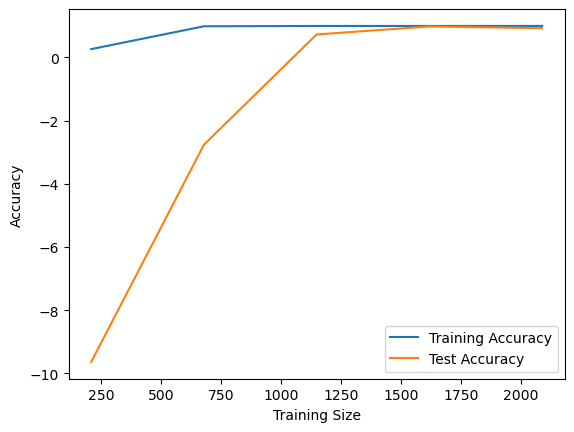

In [29]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# deep learning models

## RNN

Epoch 1/20


C:\Users\cl501_27\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1136 - mae: 0.2371 - val_loss: 0.0014 - val_mae: 0.0297
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mae: 0.0833 - val_loss: 0.0013 - val_mae: 0.0292
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mae: 0.0675 - val_loss: 0.0018 - val_mae: 0.0336
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mae: 0.0598 - val_loss: 0.0055 - val_mae: 0.0612
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mae: 0.0542 - val_loss: 0.0036 - val_mae: 0.0495
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mae: 0.0478 - val_loss: 0.0037 - val_mae: 0.0511
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mae: 0.0440 - val_loss: 0.0025 - val_mae: 0.0416
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0052 - val_mae: 0.0633
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mae: 0.0390 - va

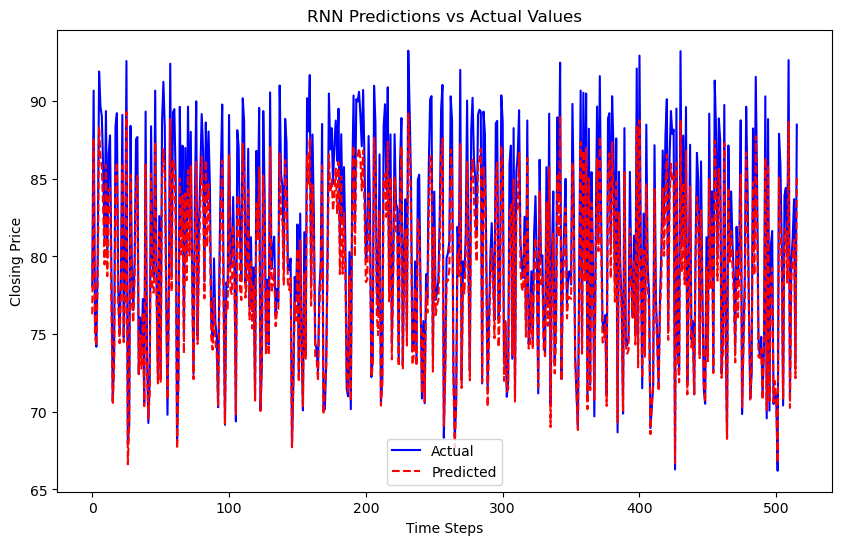

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X= X.select_dtypes('number').values
# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# LSTM

Epoch 1/20


C:\Users\cl501_27\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0333 - mae: 0.1294 - val_loss: 0.0021 - val_mae: 0.0367
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mae: 0.0549 - val_loss: 0.0030 - val_mae: 0.0454
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mae: 0.0447 - val_loss: 0.0041 - val_mae: 0.0519
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mae: 0.0395 - val_loss: 0.0032 - val_mae: 0.0474
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0042 - val_mae: 0.0563
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mae: 0.0319 - val_loss: 0.0052 - val_mae: 0.0614
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 0.0053 - val_mae: 0.0611
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0284 - val_loss: 0.0070 - val_mae: 0.0717
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0263 - va

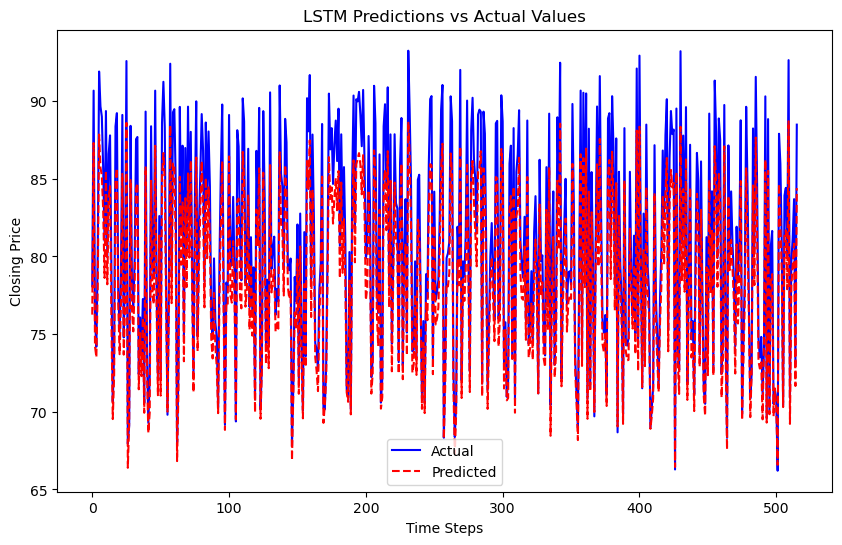

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# GRU

Epoch 1/20


C:\Users\cl501_27\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0929 - mae: 0.2124 - val_loss: 9.0660e-04 - val_mae: 0.0236
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - mae: 0.0641 - val_loss: 8.9380e-04 - val_mae: 0.0239
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mae: 0.0549 - val_loss: 9.3178e-04 - val_mae: 0.0244
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mae: 0.0470 - val_loss: 6.0894e-04 - val_mae: 0.0197
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mae: 0.0416 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mae: 0.0415 - val_loss: 0.0011 - val_mae: 0.0277
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0036 - val_mae: 0.0525
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0323 - val_loss: 0.0046 - val_mae: 0.0575
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - 

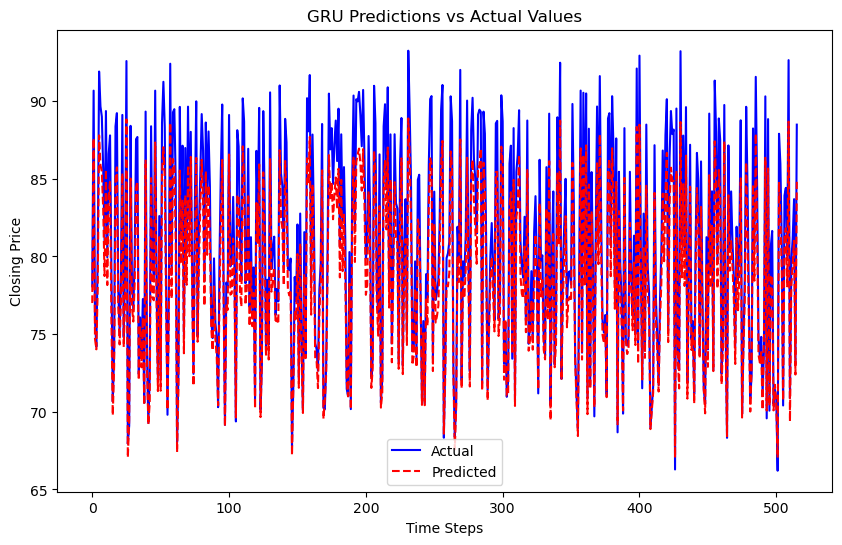

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = gru_model.evaluate(X_train, y_train)
test_loss, test_mae = gru_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("GRU Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# cnn

Epoch 1/20


d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0836 - mae: 0.1921 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mae: 0.0679 - val_loss: 0.0013 - val_mae: 0.0285
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0533 - val_loss: 0.0013 - val_mae: 0.0287
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mae: 0.0449 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - mae: 0.0404 - val_loss: 0.0013 - val_mae: 0.0294
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0387 - val_loss: 8.2730e-04 - val_mae: 0.0229
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0014 - val_mae: 0.0298
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 8.2020e-04 - val_mae: 0.0231
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.

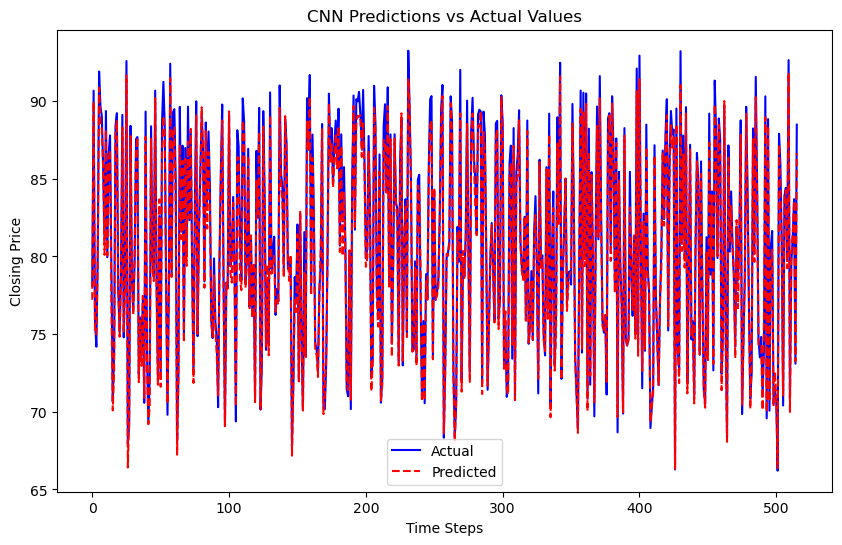

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# cnn -lstm

Epoch 1/20


d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0834 - mae: 0.1825 - val_loss: 0.0020 - val_mae: 0.0350
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mae: 0.0392 - val_loss: 0.0028 - val_mae: 0.0435
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0045 - val_mae: 0.0582
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0061 - val_mae: 0.0687
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mae: 0.0335 - val_loss: 0.0030 - val_mae: 0.0472
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0046 - val_mae: 0.0592
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - mae: 0.0280 - val_loss: 0.0039 - val_mae: 0.0551
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0043 - val_mae: 0.0567
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - mae: 0.

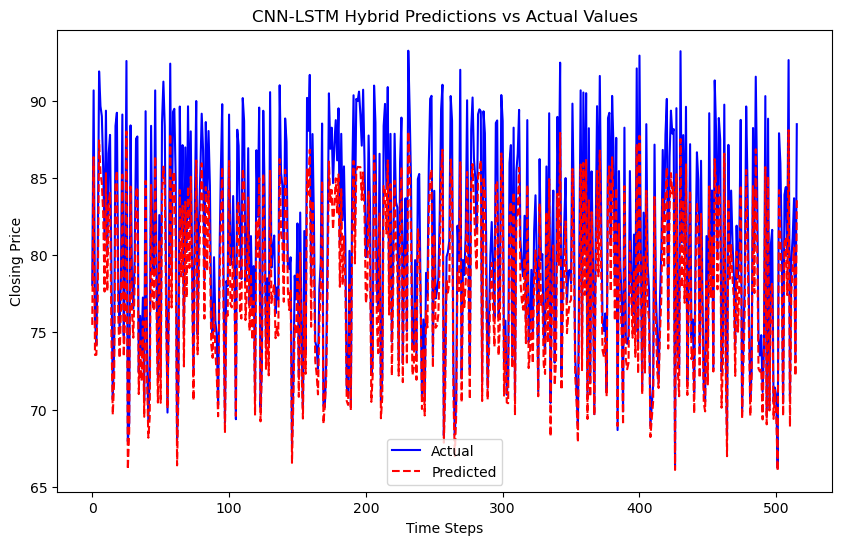

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN-LSTM Hybrid Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# sarima

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



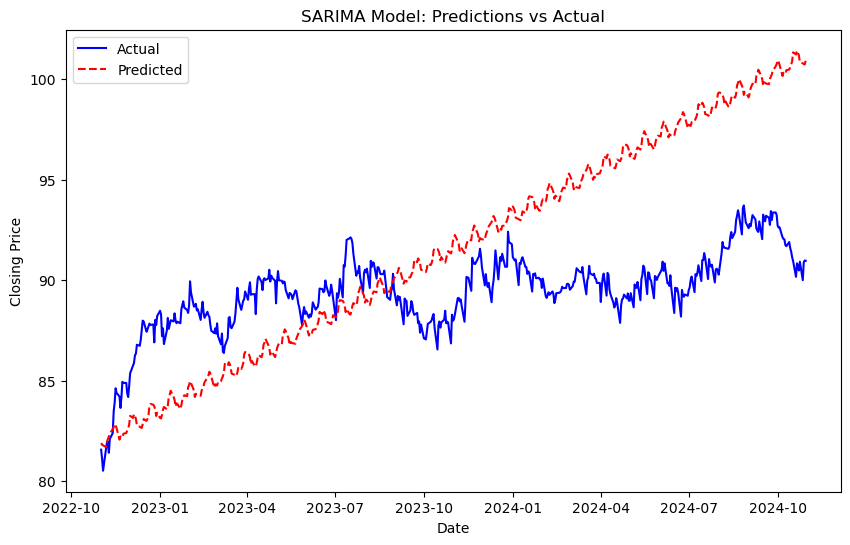

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2087
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 14)   Log Likelihood               -1664.924
Date:                            Wed, 27 Nov 2024   AIC                           3341.849
Time:                                    15:37:16   BIC                           3375.620
Sample:                                         0   HQIC                          3354.232
                                           - 2087                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric -1.275e-06   2.37e-07     -5.390      0.000   -1.74e-06   -8.12e-07
ar.L1            0.1897      

In [22]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assume jpy_inr is your DataFrame with the 'Date' column and target 'Closing_price'
# Ensure 'Date' is in datetime format
eur_inr['Date'] = pd.to_datetime(eur_inr['Date'])

# Convert 'Date' to numeric (timestamp)
eur_inr['Date_numeric'] = eur_inr['Date'].apply(lambda x: x.timestamp())

# Set the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(eur_inr) * 0.8)
train, test = eur_inr[:train_size], eur_inr[train_size:]

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(1, 1, 1),  # AR, I, MA order
                       seasonal_order=(1, 1, 1, 14),  # Seasonal order
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



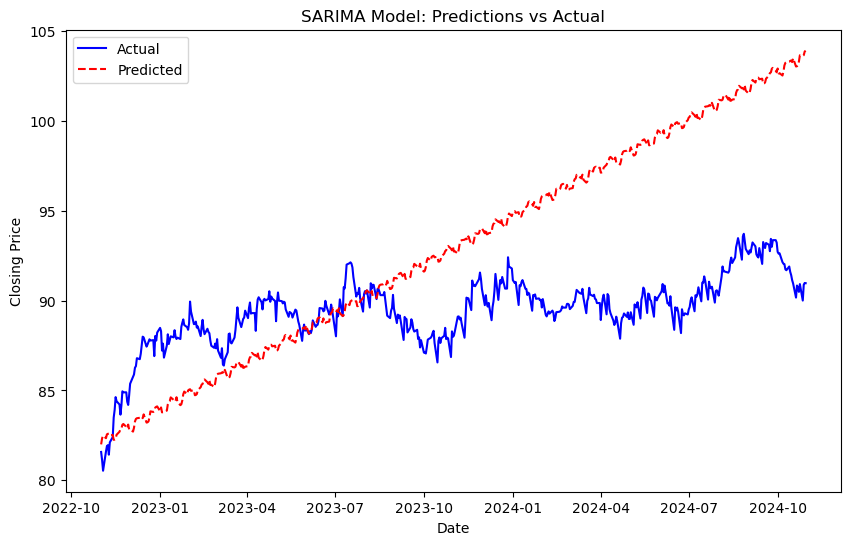

Root Mean Squared Error (RMSE): 6.1237


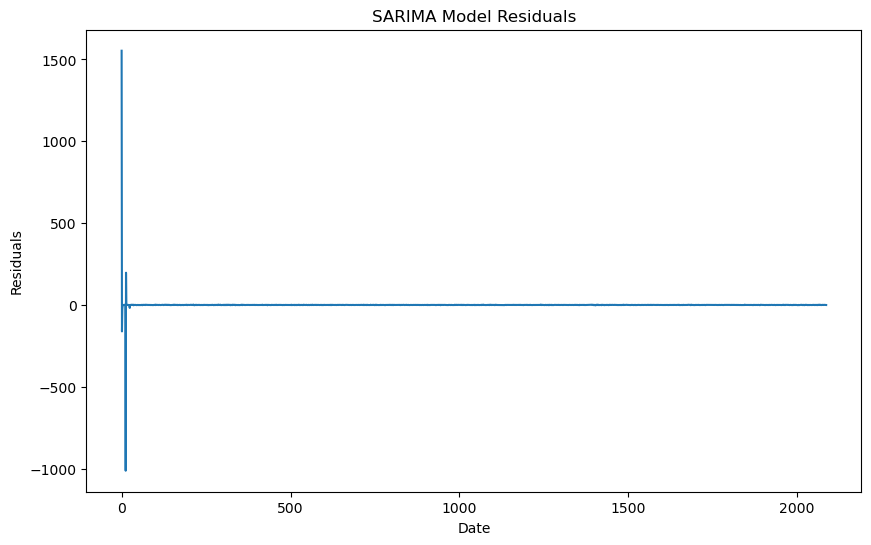

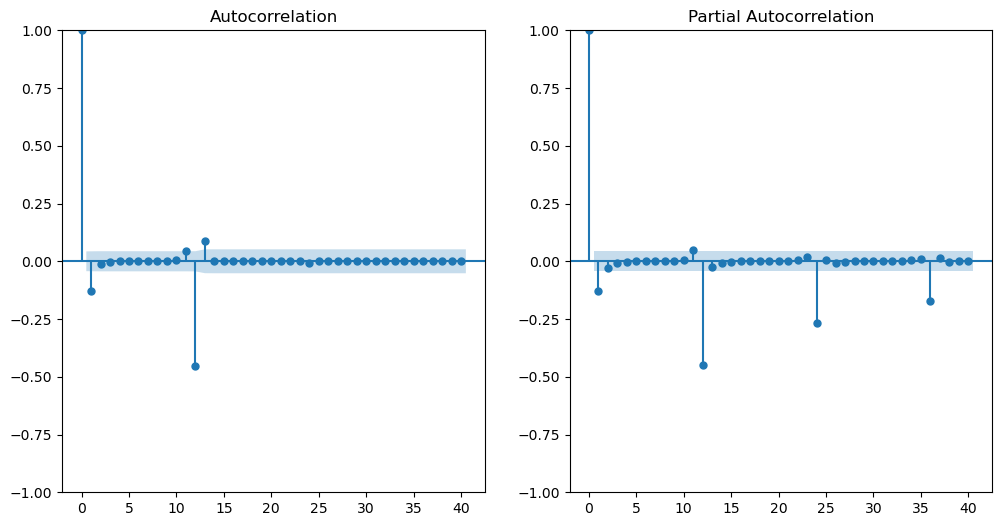

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2087
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1656.565
Date:                            Sun, 24 Nov 2024   AIC                           3325.130
Time:                                    15:03:55   BIC                           3358.912
Sample:                                         0   HQIC                          3337.515
                                           - 2087                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric -1.043e-06   2.38e-07     -4.378      0.000   -1.51e-06   -5.76e-07
ar.L1            0.3123      

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Ensure 'Date' is in datetime format
eur_inr['Date'] = pd.to_datetime(eur_inr['Date'])

# Convert 'Date' to numeric (timestamp)
eur_inr['Date_numeric'] = eur_inr['Date'].apply(lambda x: x.timestamp())

# Define the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(eur_inr) * 0.8)
train, test = eur_inr[:train_size], eur_inr[train_size:]

# Hyperparameters for SARIMA
p, d, q = 1, 1, 1  # AR, I, MA order
P, D, Q, S = 1, 1, 1, 12  # Seasonal AR, I, MA order, and period

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, S), 
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Evaluate the model with RMSE
rmse_val = rmse(test[target], predictions)
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")

# Plot residuals to check for patterns
residuals = sarima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


# fb prophet

In [37]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Calculate MAE, MSE, RMSE, and MAPE for the train and test sets
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    accuracy = 100 - mape  # Accuracy-like score as (100% - MAPE)
    
    return mae, mse, rmse, mape, accuracy

In [41]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = eur_inr  # Replace this with your data
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)
df.dropna(inplace=True)

# Add the 'cap' column for logistic growth (set it to the max of 'y')
df['cap'] = df['y'].max()

# Define regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
    'Lower Band'
]

# Ensure all regressors are present in the data
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Set up the hyperparameters grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1, 10, 20],
    'holidays_prior_scale': [10, 15, 20],
    'changepoint_range': [0.8, 0.9],
    'growth': ['linear', 'logistic']  # Will test both linear and logistic growth
}

# Initialize variables to store the best model and best score
best_model = None
best_score = float('inf')
best_params = {}

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return mae, mse, rmse, mape, accuracy

# Grid Search Loop
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for changepoint_range in param_grid['changepoint_range']:
                for growth in param_grid['growth']:
                    # Initialize Prophet with the current set of hyperparameters
                    prophet_model = Prophet(
                        changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        holidays_prior_scale=holidays_prior_scale,
                        changepoint_range=changepoint_range,
                        growth=growth
                    )
                    
                    # Add regressors to the model
                    for regressor in regressors:
                        prophet_model.add_regressor(regressor)
                    
                    # Train the model
                    if growth == 'logistic':
                        prophet_model.fit(train[['ds', 'y', 'cap'] + regressors])
                    else:
                        prophet_model.fit(train[['ds', 'y'] + regressors])
                    
                    # Create a future dataframe for predictions
                    future = prophet_model.make_future_dataframe(periods=len(test))
                    
                    # Add regressor values to the future dataframe
                    for regressor in regressors:
                        future[regressor] = df[regressor]
                    
                    # Add the 'cap' column for logistic growth
                    if growth == 'logistic':
                        future['cap'] = df['cap'].iloc[0]  # Constant value
                    
                    # Make predictions
                    forecast = prophet_model.predict(future)
                    
                    # Evaluate model performance on the test set
                    test_yhat = forecast['yhat'][-len(test):].values
                    _, mse, _, _, _ = evaluate_model(test['y'].values, test_yhat)
                    
                    # If the model has better performance, store it
                    if mse < best_score:
                        best_score = mse
                        best_model = prophet_model
                        best_params = {
                            'changepoint_prior_scale': changepoint_prior_scale,
                            'seasonality_prior_scale': seasonality_prior_scale,
                            'holidays_prior_scale': holidays_prior_scale,
                            'changepoint_range': changepoint_range,
                            'growth': growth
                        }

# Output the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
future = best_model.make_future_dataframe(periods=len(test))
for regressor in regressors:
    future[regressor] = df[regressor]
if best_params['growth'] == 'logistic':
    future['cap'] = df['cap'].iloc[0]

best_forecast = best_model.predict(future)
test_yhat = best_forecast['yhat'][-len(test):].values
mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)

print("Test Metrics for Best Model:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")


18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:24 - cmdstanpy - INFO - Chain [1] done processing
18:54:25 - cmdstanpy - INFO - Chain [1] start processing
18:54:29 - cmdstanpy - INFO - Chain [1] done processing
18:54:39 - cmdstanpy - INFO - Chain [1] start processing
18:54:40 - cmdstanpy - INFO - Chain [1] done processing
18:54:41 - cmdstanpy - INFO - Chain [1] start processing
18:54:44 - cmdstanpy - INFO - Chain [1] done processing
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:58 - cmdstanpy - INFO - Chain [1] done processing
18:54:59 - cmdstanpy - INFO - Chain [1] start processing
18:55:03 - cmdstanpy - INFO - Chain [1] done processing
18:55:15 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:21 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:36 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 20, 'changepoint_range': 0.9, 'growth': 'logistic'}
Best MSE: 0.13442011881993657
Test Metrics for Best Model:
MAE: 0.2888, MSE: 0.1344, RMSE: 0.3666, MAPE: 0.32%, Accuracy: 99.68%


In [42]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
# Ensure your dataset has columns like 'Date', 'Closing_price', 'RSI', 'MACD', etc.
df = eur_inr  # Replace `eur_inr` with your actual dataframe variable
print("Columns in dataset:", df.columns)

# Rename columns as Prophet requires 'ds' (date) and 'y' (target)
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Add 'cap' column for logistic growth (define a realistic upper limit for your target variable)
df['cap'] = df['y'].max() * 1.1  # 10% higher than max value as an example
df['floor'] = 0  # Optionally, add a floor column

# Specify the additional regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band', 'Lower Band'
]

# Ensure all specified regressors are present in the dataset
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Initialize the Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    changepoint_range=best_params['changepoint_range'],
    growth='logistic'  # Ensure logistic growth
)

# Add each regressor to the Prophet model
for regressor in regressors:
    prophet_model.add_regressor(regressor)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Train the model
prophet_model.fit(train[['ds', 'y', 'cap', 'floor'] + regressors])

# Create a future dataframe for predictions
future = prophet_model.make_future_dataframe(periods=len(test))
future['cap'] = df['cap'].iloc[0]  # Use the same cap value for future
future['floor'] = df['floor'].iloc[0]  # Use the same floor value for future

# Add regressors to the future dataframe
for regressor in regressors:
    future[regressor] = df[regressor]

# Make predictions
forecast = prophet_model.predict(future)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return mae, mse, rmse, mape, accuracy

# Evaluate on train and test sets
train_forecast = prophet_model.predict(train[['ds', 'cap', 'floor'] + regressors])
train_yhat = train_forecast['yhat'].values
train_metrics = evaluate_model(train['y'].values, train_yhat)

test_forecast = prophet_model.predict(test[['ds', 'cap', 'floor'] + regressors])
test_yhat = test_forecast['yhat'].values
test_metrics = evaluate_model(test['y'].values, test_yhat)

# Print metrics
print("Train Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, MAPE: {train_metrics[3]:.2f}%, Accuracy: {train_metrics[4]:.2f}%")
print("\nTest Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, MAPE: {test_metrics[3]:.2f}%, Accuracy: {test_metrics[4]:.2f}%")

# Plot predictions vs actual values
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot predicted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted', line=dict(color='red')))

# Plot upper and lower bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound',
    line=dict(color='lightgrey', dash='dot')
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound',
    line=dict(color='lightgrey', dash='dot')
))

# Update layout
fig.update_layout(
    title="Prophet with Regressors: Predictions vs Actual",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


Columns in dataset: Index(['ds', 'Open_price', 'Day_high', 'Day_low', 'y', 'Currency Pair',
       'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band', 'Date_numeric', 'cap'],
      dtype='object')


19:15:54 - cmdstanpy - INFO - Chain [1] start processing
19:15:57 - cmdstanpy - INFO - Chain [1] done processing


Train Metrics:
MAE: 0.1373, MSE: 0.0399, RMSE: 0.1997, MAPE: 0.18%, Accuracy: 99.82%

Test Metrics:
MAE: 0.2212, MSE: 0.0820, RMSE: 0.2864, MAPE: 0.25%, Accuracy: 99.75%


# Bidirectional- LSTM

In [19]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   - -------------------------------------- 13.6/390.2 MB 77.7 MB/s eta 0:00:05
   -- ------------------------------------- 21.5/390.2 MB 56.6 MB/s eta 0:00:07
   --- ------------------------------------ 30.9/390.2 MB 51.6 MB/s eta 0:00:07
   ---- ----------------------------------- 40.6/390.2 MB 49.7 MB/s eta 0:00:08
   ----- ---------------------------------- 50.9/390.2 MB 51.4 MB/s eta 0:00:07
   ----- ---------------------------------- 57.9/390.2 MB 46.7 MB/s eta 0:00:08
   ------ --------------------------------- 65.0/390.2 MB 45.0 MB/s eta 0:00:08
   ------- -------------------------------- 73.7/390.2 MB 44.3 MB/s eta 0:00:08
   -------- ------------------------------- 86.2/390.2 MB 46.6 MB/s eta 0:00:07
   --------- ------------------------------ 94.4/390.2 MB 44.9 MB/s eta 0:00:07
   ---------- ---------------------------- 103.5/39

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20


C:\Users\cl501_27\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0778 - mae: 0.1820 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mae: 0.0526 - val_loss: 0.0014 - val_mae: 0.0284
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mae: 0.0498 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mae: 0.0446 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0413 - val_loss: 0.0017 - val_mae: 0.0330
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0027 - val_mae: 0.0433
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mae: 0.0358 - val_loss: 0.0040 - val_mae: 0.0559
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0037 - val_mae: 0.0522
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mae: 0.0329 - va

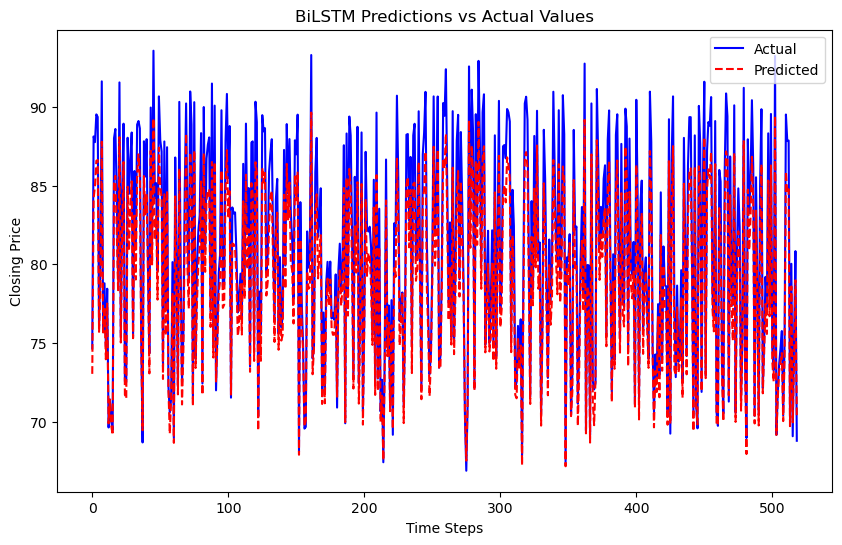

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 14

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False)),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("BiLSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()
